### Import Dataset

In [1]:
import pandas as pd

df = pd.read_csv("../data/20250103T03-00-00_20250110T03-00-00_7.csv")
df.head()


,TimeStamp,Tag Name,ABB_X,ABB_Y,ABB_Z,Chamber_Temp,Chamber_Pressure,Main_Gas_Flow,PF1_Gas_Flow,PF2_Gas_Flow,PF1_LibraWeight,PF2_LibraWeight,PF1_Pressure,PF2_Pressure
0,20250106T4:11:24.000,calc:Coldspray_data_,-759.84,-2213.28,1286.59,1000.0,4.998,1705.0,299.9,0.0,62.26,62.6,5.19,0.002
1,20250106T4:11:25.000,calc:Coldspray_data_,-759.84,-2213.28,1286.59,1000.0,4.995,1706.0,299.4,0.0,62.26,62.6,5.19,0.002
2,20250106T4:11:26.000,calc:Coldspray_data_,-759.84,-2213.28,1286.59,1000.0,4.998,1713.0,297.1,0.0,62.26,62.6,5.19,0.002
3,20250106T4:11:27.000,calc:Coldspray_data_,-759.84,-2213.28,1286.59,1000.0,4.998,1713.0,299.0,0.0,62.26,62.6,5.19,0.002
4,20250106T4:11:28.000,calc:Coldspray_data_,-759.84,-2213.28,1286.59,1000.0,4.995,1720.0,300.2,0.0,62.26,62.6,5.19,0.002


### Filter specific range of data

In [2]:
from datetime import datetime

# Convert TimeStamp column to datetime
df["TimeStamp"] = pd.to_datetime(df["TimeStamp"], format="%Y%m%dT%H:%M:%S.%f")

# Bad Conditioned Nozzle
b_start_time = datetime.strptime("20250106T4:12:00.000", "%Y%m%dT%H:%M:%S.%f")
b_end_time = datetime.strptime("20250106T4:39:59.000", "%Y%m%dT%H:%M:%S.%f")
b_df = df[(df["TimeStamp"] >= b_start_time) & (df["TimeStamp"] <= b_end_time)].reset_index(drop=True)

# Bad Conditioned Nozzle
g_start_time = datetime.strptime("20250106T6:38:00.000", "%Y%m%dT%H:%M:%S.%f")
g_end_time = datetime.strptime("20250106T7:05:59.000", "%Y%m%dT%H:%M:%S.%f") 
g_df = df[(df["TimeStamp"] >= g_start_time) & (df["TimeStamp"] <= g_end_time)].reset_index(drop=True)

b_df['Nozzle_Condition'] = 0
g_df['Nozzle_Condition'] = 1

print(f"Number of bad data points: {len(b_df)}")
print(f"Number of good data points: {len(g_df)}")


Number of bad data points: 1680
Number of good data points: 1680


In [3]:
b_df.head()

,TimeStamp,Tag Name,ABB_X,ABB_Y,ABB_Z,Chamber_Temp,Chamber_Pressure,Main_Gas_Flow,PF1_Gas_Flow,PF2_Gas_Flow,PF1_LibraWeight,PF2_LibraWeight,PF1_Pressure,PF2_Pressure,Nozzle_Condition
0,2025-01-06 04:12:00,calc:Coldspray_data_,-759.84,-2213.28,1286.59,1000.0,4.993,1739.0,300.4,0.0,62.26,62.6,5.187,0.002,0
1,2025-01-06 04:12:01,calc:Coldspray_data_,-759.84,-2213.28,1286.59,1000.0,4.993,1730.0,301.1,0.0,62.26,62.6,5.185,0.002,0
2,2025-01-06 04:12:02,calc:Coldspray_data_,-759.84,-2213.28,1286.59,1000.0,4.993,1729.0,301.4,0.0,62.26,62.6,5.187,0.002,0
3,2025-01-06 04:12:03,calc:Coldspray_data_,-759.84,-2213.28,1286.59,1000.0,4.995,1736.0,300.2,0.0,62.26,62.6,5.187,0.002,0
4,2025-01-06 04:12:04,calc:Coldspray_data_,-759.84,-2213.28,1286.59,1000.0,4.995,1734.0,298.7,0.0,62.26,62.6,5.185,0.002,0


In [4]:
g_df.head()

,TimeStamp,Tag Name,ABB_X,ABB_Y,ABB_Z,Chamber_Temp,Chamber_Pressure,Main_Gas_Flow,PF1_Gas_Flow,PF2_Gas_Flow,PF1_LibraWeight,PF2_LibraWeight,PF1_Pressure,PF2_Pressure,Nozzle_Condition
0,2025-01-06 06:38:00,calc:Coldspray_data_,-759.84,-2213.28,1286.59,1000.0,4.998,1775.0,297.5,0.0,62.26,62.59,5.19,0.002,1
1,2025-01-06 06:38:01,calc:Coldspray_data_,-759.84,-2213.28,1286.59,1000.0,4.998,1784.0,299.4,0.0,62.26,62.59,5.19,0.002,1
2,2025-01-06 06:38:02,calc:Coldspray_data_,-759.84,-2213.28,1286.59,1000.0,4.998,1779.0,300.6,0.0,62.26,62.59,5.19,0.002,1
3,2025-01-06 06:38:03,calc:Coldspray_data_,-759.84,-2213.28,1286.59,1000.0,4.998,1775.0,300.7,0.0,62.26,62.59,5.19,0.002,1
4,2025-01-06 06:38:04,calc:Coldspray_data_,-759.84,-2213.28,1286.59,1000.0,4.998,1775.0,301.1,0.0,62.26,62.59,5.19,0.002,1


In [5]:
import numpy as np

df_concat = pd.concat([b_df, g_df], ignore_index=True)
# df_concat["Chamber_Pressure_Norm"] = (df_concat["Chamber_Pressure"] - np.mean(df_concat["Chamber_Pressure"])) / np.std(df_concat["Chamber_Pressure"])
# df_concat["Main_Gas_Flow_Norm"] = (df_concat["Main_Gas_Flow"] - np.mean(df_concat["Main_Gas_Flow"])) / np.std(df_concat["Main_Gas_Flow"])
# df_concat["PF1_Pressure_Norm"] = (df_concat["PF1_Pressure"] - np.mean(df_concat["PF1_Pressure"])) / np.std(df_concat["PF1_Pressure"])
# df_concat["PF1_Gas_Flow_Norm"] = (df_concat["PF1_Gas_Flow"] - np.mean(df_concat["PF1_Gas_Flow"])) / np.std(df_concat["PF1_Gas_Flow"])

print(df_concat.shape)
df_concat.head()

(3360, 15)


,TimeStamp,Tag Name,ABB_X,ABB_Y,ABB_Z,Chamber_Temp,Chamber_Pressure,Main_Gas_Flow,PF1_Gas_Flow,PF2_Gas_Flow,PF1_LibraWeight,PF2_LibraWeight,PF1_Pressure,PF2_Pressure,Nozzle_Condition
0,2025-01-06 04:12:00,calc:Coldspray_data_,-759.84,-2213.28,1286.59,1000.0,4.993,1739.0,300.4,0.0,62.26,62.6,5.187,0.002,0
1,2025-01-06 04:12:01,calc:Coldspray_data_,-759.84,-2213.28,1286.59,1000.0,4.993,1730.0,301.1,0.0,62.26,62.6,5.185,0.002,0
2,2025-01-06 04:12:02,calc:Coldspray_data_,-759.84,-2213.28,1286.59,1000.0,4.993,1729.0,301.4,0.0,62.26,62.6,5.187,0.002,0
3,2025-01-06 04:12:03,calc:Coldspray_data_,-759.84,-2213.28,1286.59,1000.0,4.995,1736.0,300.2,0.0,62.26,62.6,5.187,0.002,0
4,2025-01-06 04:12:04,calc:Coldspray_data_,-759.84,-2213.28,1286.59,1000.0,4.995,1734.0,298.7,0.0,62.26,62.6,5.185,0.002,0


### Exploratory Data Analysis (EDA)

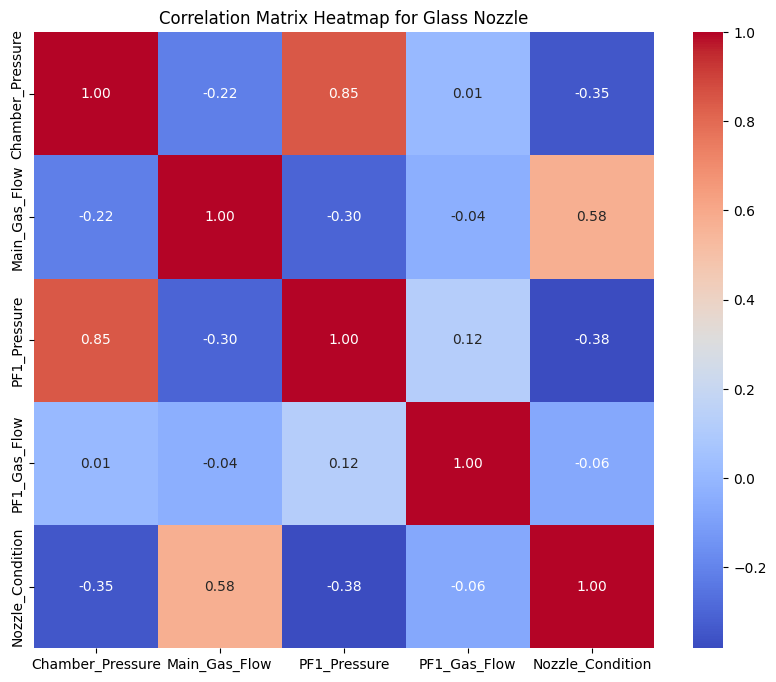

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with all the Process Parameter along with the Condition of the Nozzle
corr_var = ["Chamber_Pressure", "Main_Gas_Flow", "PF1_Pressure", "PF1_Gas_Flow", "Nozzle_Condition"]
corr_var_df = df_concat[corr_var]

# Compute the covariance matrix
corr_matrix = corr_var_df.corr(method='pearson')

# Visualization (Optional)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap for Glass Nozzle")
# plt.savefig(f"../graphs/Correlaton_Matrix.png", format="png", dpi=300, bbox_inches="tight")
plt.show()


In [7]:
import matplotlib.pyplot as plt

def plot_columns_in_grid_overlay(bad_df, good_df, pros_param, nrows=2, ncols=2, figsize=(20, 10), graph_name="results.png"):
    """
    Plots multiple columns from two DataFrames ("good" and "bad") in a 2x2 grid of subplots,
    overlaying the corresponding variables for comparison.

    Parameters:
        good_df (pd.DataFrame): The DataFrame containing the "good" data.
        bad_df (pd.DataFrame): The DataFrame containing the "bad" data.
        pros_param (list): List of process parameters to monitor.
        nrows (int): Number of rows in the grid (default: 2).
        ncols (int): Number of columns in the grid (default: 2).
        figsize (tuple): Figure size (default: (10, 8)).
        graph_name (str): Name of the file to save the plot.

    Returns:
        None
    """

    bad_df = bad_df.reset_index(drop=True)
    good_df = good_df.reset_index(drop=True)

    # Create a grid of subplots
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

    # Plot each column in the corresponding subplot
    for i, column in enumerate(pros_param):
        if i < len(axes):  # Avoid indexing errors
            ax = axes[i]

            # Plot data from the "good" DataFrame
            if column in good_df.columns:
                ax.plot(
                    good_df[column],
                    marker=".",
                    label=f"Good - {column}",
                    alpha=0.7,
                    color="g",
                )

            # Plot data from the "bad" DataFrame
            if column in bad_df.columns:
                ax.plot(
                    bad_df[column],
                    marker=".",
                    label=f"Bad - {column}",
                    alpha=0.7,
                    color="r",
                )

            # Set title and labels
            ax.set_title(column, fontsize=10)
            ax.legend(fontsize=8)
            ax.grid(True)
            ax.get_xaxis().set_visible(False)  # Hide x-axis
            ax.set_ylabel(column, fontsize=8)

    # Remove unused subplots
    for i in range(len(pros_param), len(axes)):
        fig.delaxes(axes[i])

    # Adjust layout
    plt.tight_layout()
    # plt.savefig(graph_name, format="png", dpi=300, bbox_inches="tight")
    plt.show()




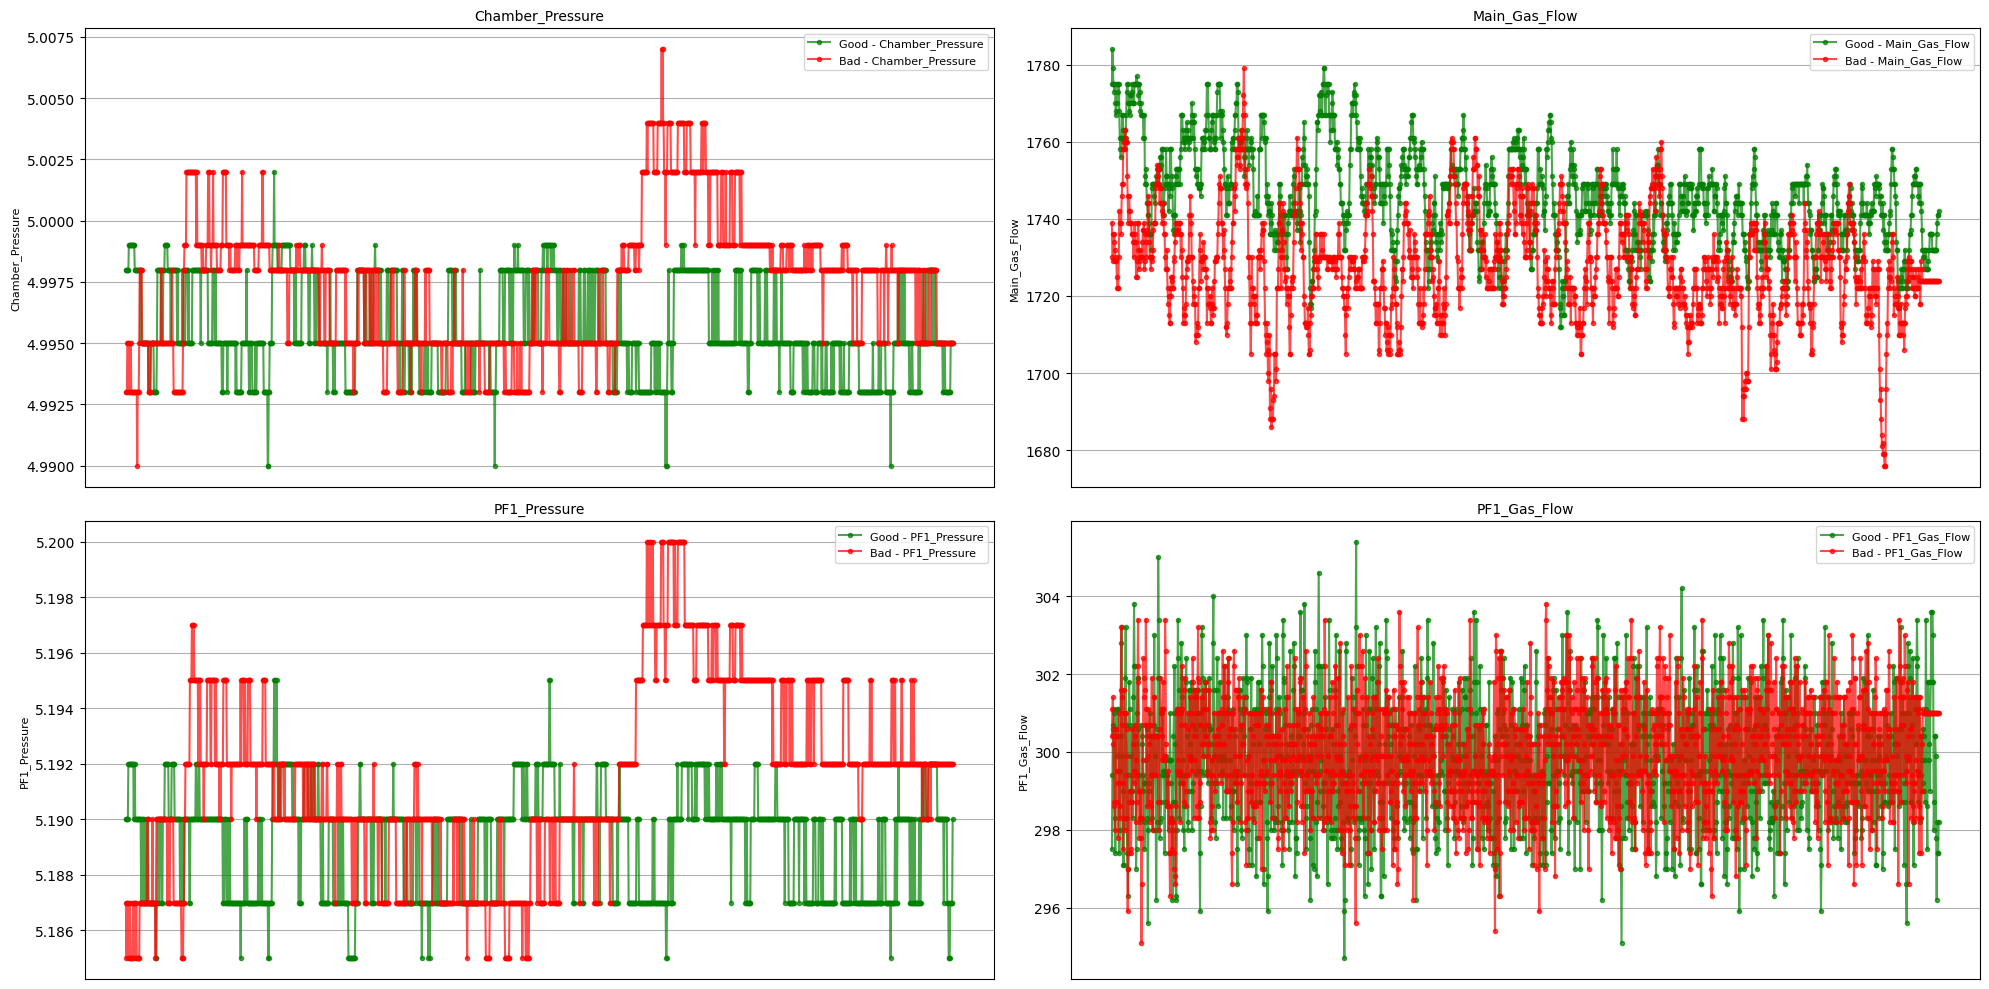

In [8]:
# List of columns for y-axis
pros_param = ["Chamber_Pressure", "Main_Gas_Flow", "PF1_Pressure", "PF1_Gas_Flow"]
# pros_param = ["Chamber_Pressure_Norm", "Main_Gas_Flow_Norm", "PF1_Pressure_Norm", "PF1_Gas_Flow_Norm"]

plot_columns_in_grid_overlay(bad_df=df_concat[df_concat["Nozzle_Condition"] == 0], good_df=df_concat[df_concat["Nozzle_Condition"] == 1], pros_param=pros_param, graph_name="results.png")


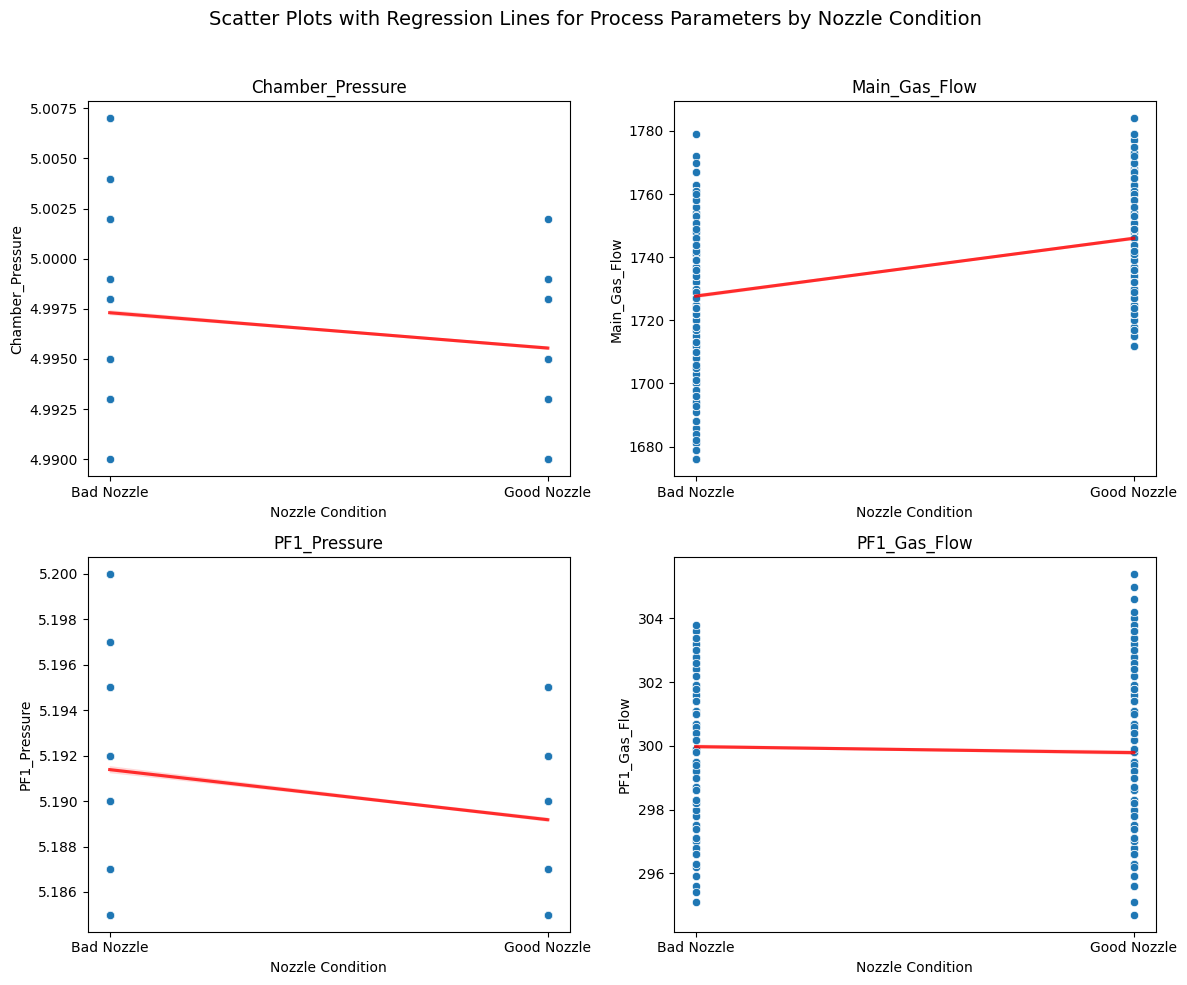

In [9]:
# Set up the figure and axes for a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Scatter Plots with Regression Lines for Process Parameters by Nozzle Condition", fontsize=14)

# Plot each parameter in a subplot
for ax, param, title in zip(axes.flatten(), pros_param, pros_param):
    # Use sns.scatterplot for scatter points
    sns.scatterplot(
        x="Nozzle_Condition",
        y=param,
        data=df_concat,
        ax=ax,
    )
    
    # Add a regression line
    sns.regplot(
        x="Nozzle_Condition",
        y=param,
        data=df_concat,
        ax=ax,
        scatter=False,  # Prevent regplot from adding additional scatter points
        line_kws={"color": "red", "alpha": 0.8},  # Customize regression line color and transparency
        order=1,  # Linear regression; change to higher order for polynomial regression
    )
    
    # Set custom x-axis labels
    ax.set_title(title, fontsize=12)
    ax.set_xticks([0, 1])  # Ensure tick positions match the nozzle conditions
    ax.set_xticklabels(['Bad Nozzle', 'Good Nozzle'])  # Set custom labels
    ax.set_xlabel("Nozzle Condition", fontsize=10)  # X-axis label
    ax.set_ylabel(param, fontsize=10)  # Y-axis label

# Adjust layout and display
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust rect for the main title
# Uncomment the line below to save the figure
# plt.savefig(f"../graphs/Scatter_with_Regression.png", format="png", dpi=300, bbox_inches="tight")
plt.show()


### Supervised Learning

Isolation Forest

C:\Users\yongz\AppData\Local\Temp\ipykernel_22344\585745894.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_df['anomaly_score'] = iso_forest.decision_function(bad_data)
C:\Users\yongz\AppData\Local\Temp\ipykernel_22344\585745894.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_df['anomaly_category'] = b_df['anomaly_score'].apply(


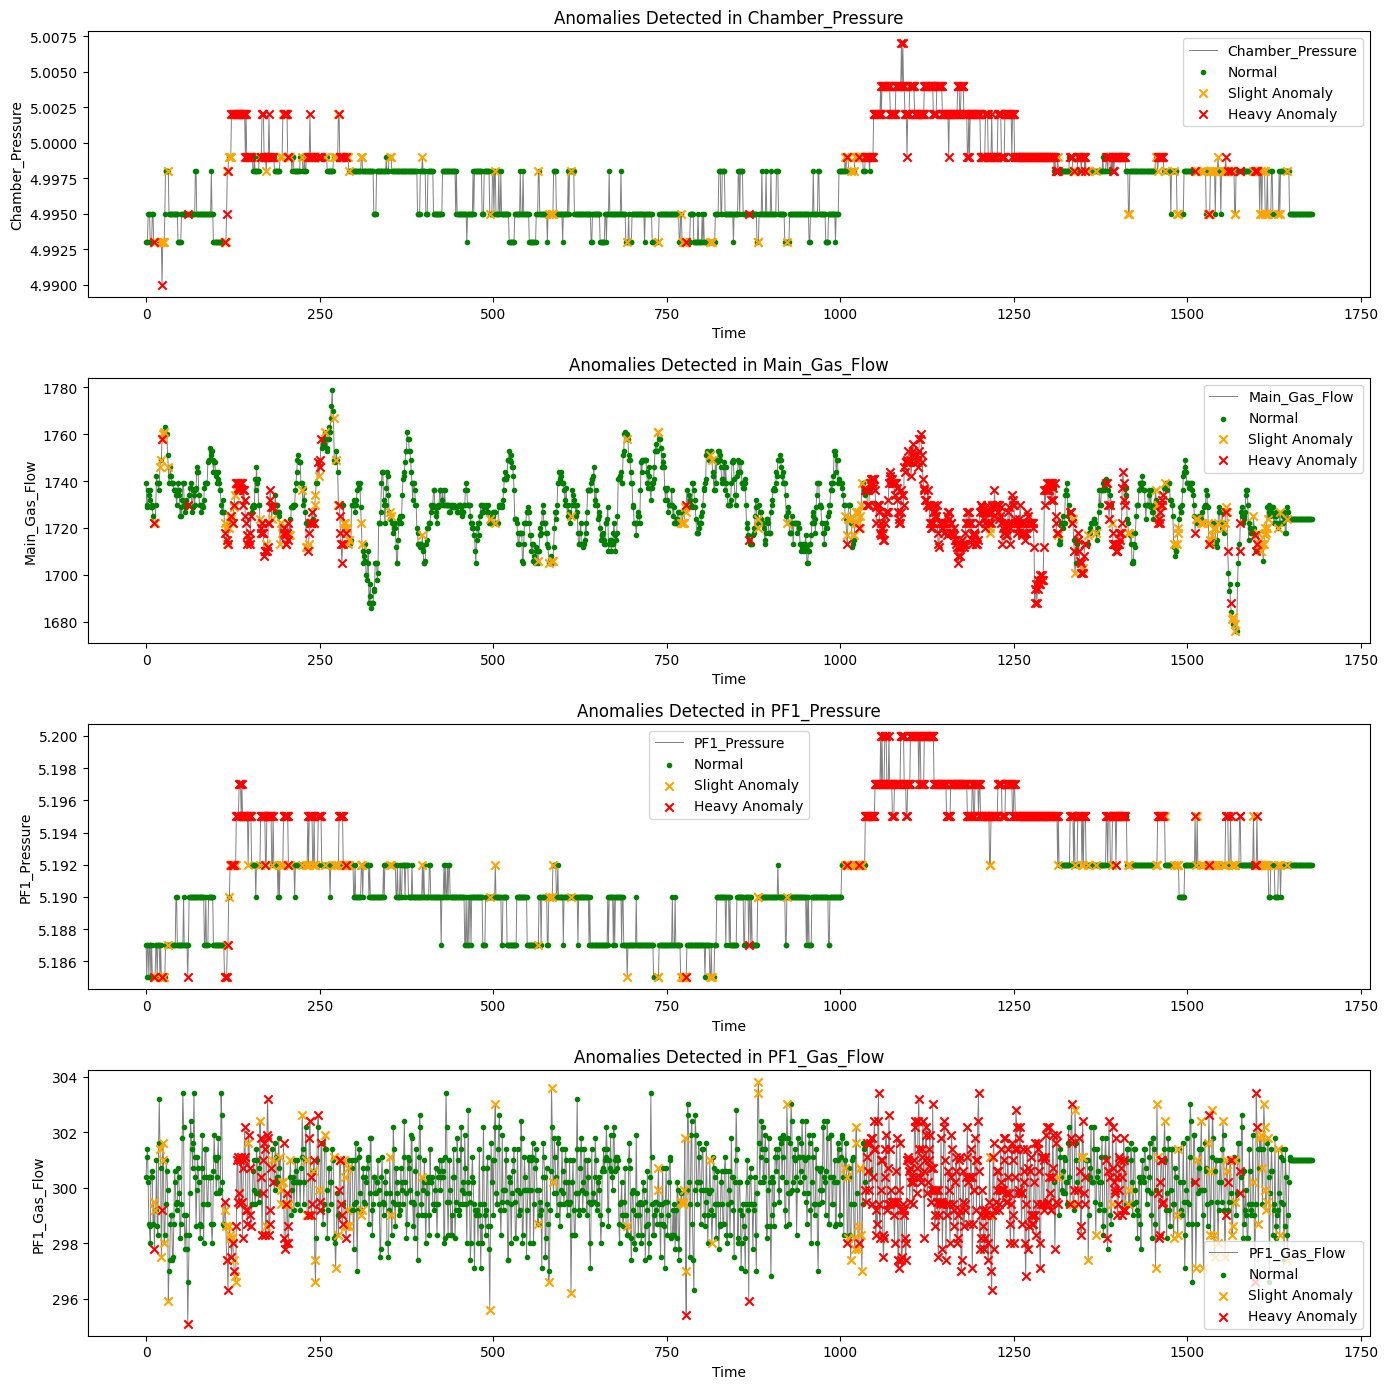

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest

# Define process parameters
pros_param = ["Chamber_Pressure", "Main_Gas_Flow", "PF1_Pressure", "PF1_Gas_Flow"]
# pros_param = ["Main_Gas_Flow"]
# pros_param = ["Chamber_Pressure_Norm", "Main_Gas_Flow_Norm", "PF1_Pressure_Norm", "PF1_Gas_Flow_Norm"]

# Ensure good_data and bad_data only contain the relevant columns
g_df = df_concat[df_concat["Nozzle_Condition"] == 1]
b_df = df_concat[df_concat["Nozzle_Condition"] == 0]
good_data = g_df[pros_param].values
bad_data = b_df[pros_param].values

# Normalization
scaler = MinMaxScaler()
good_data = scaler.fit_transform(good_data.reshape(-1, good_data.shape[-1])).reshape(good_data.shape)
bad_data = scaler.transform(bad_data.reshape(-1, bad_data.shape[-1])).reshape(bad_data.shape)

# Train Isolation Forest on good data
iso_forest = IsolationForest(contamination=0.05, random_state=0)
iso_forest.fit(good_data)

# Get anomaly scores for bad data
b_df['anomaly_score'] = iso_forest.decision_function(bad_data)

# Define thresholds for slight and heavy anomalies
slight_threshold = -0.01  # Adjust based on your data
heavy_threshold = -0.05  # Adjust based on your data

# Classify anomalies
b_df['anomaly_category'] = b_df['anomaly_score'].apply(
    lambda x: 'Heavy Anomaly' if x <= heavy_threshold else ('Slight Anomaly' if heavy_threshold < x < slight_threshold else 'Normal')
)

# Visualize anomalies for each parameter in a 2x2 grid
def plot_anomalies_grid(df, pros_param):
    fig, axes = plt.subplots(4, 1, figsize=(14, 14))  # Create a 2x2 grid of subplots
    axes = axes.flatten()  # Flatten the axes array for easier indexing

    for i, param in enumerate(pros_param):
        ax = axes[i]
        normal_data = df[df['anomaly_category'] == 'Normal']
        slight_anomalies = df[df['anomaly_category'] == 'Slight Anomaly']
        heavy_anomalies = df[df['anomaly_category'] == 'Heavy Anomaly']

        ax.plot(df.index, df[param], label=f'{param}', linewidth=0.7, color='grey', zorder=0)
        ax.scatter(normal_data.index, normal_data[param], color='green', label='Normal', marker='.')
        ax.scatter(slight_anomalies.index, slight_anomalies[param], color='orange', label='Slight Anomaly', marker='x')
        ax.scatter(heavy_anomalies.index, heavy_anomalies[param], color='red', label='Heavy Anomaly', marker='x')
        ax.set_title(f'Anomalies Detected in {param}')
        ax.set_xlabel('Time')
        ax.set_ylabel(param)
        ax.legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Call the function to plot the anomalies
plot_anomalies_grid(b_df, pros_param)


Elliptic Envelope

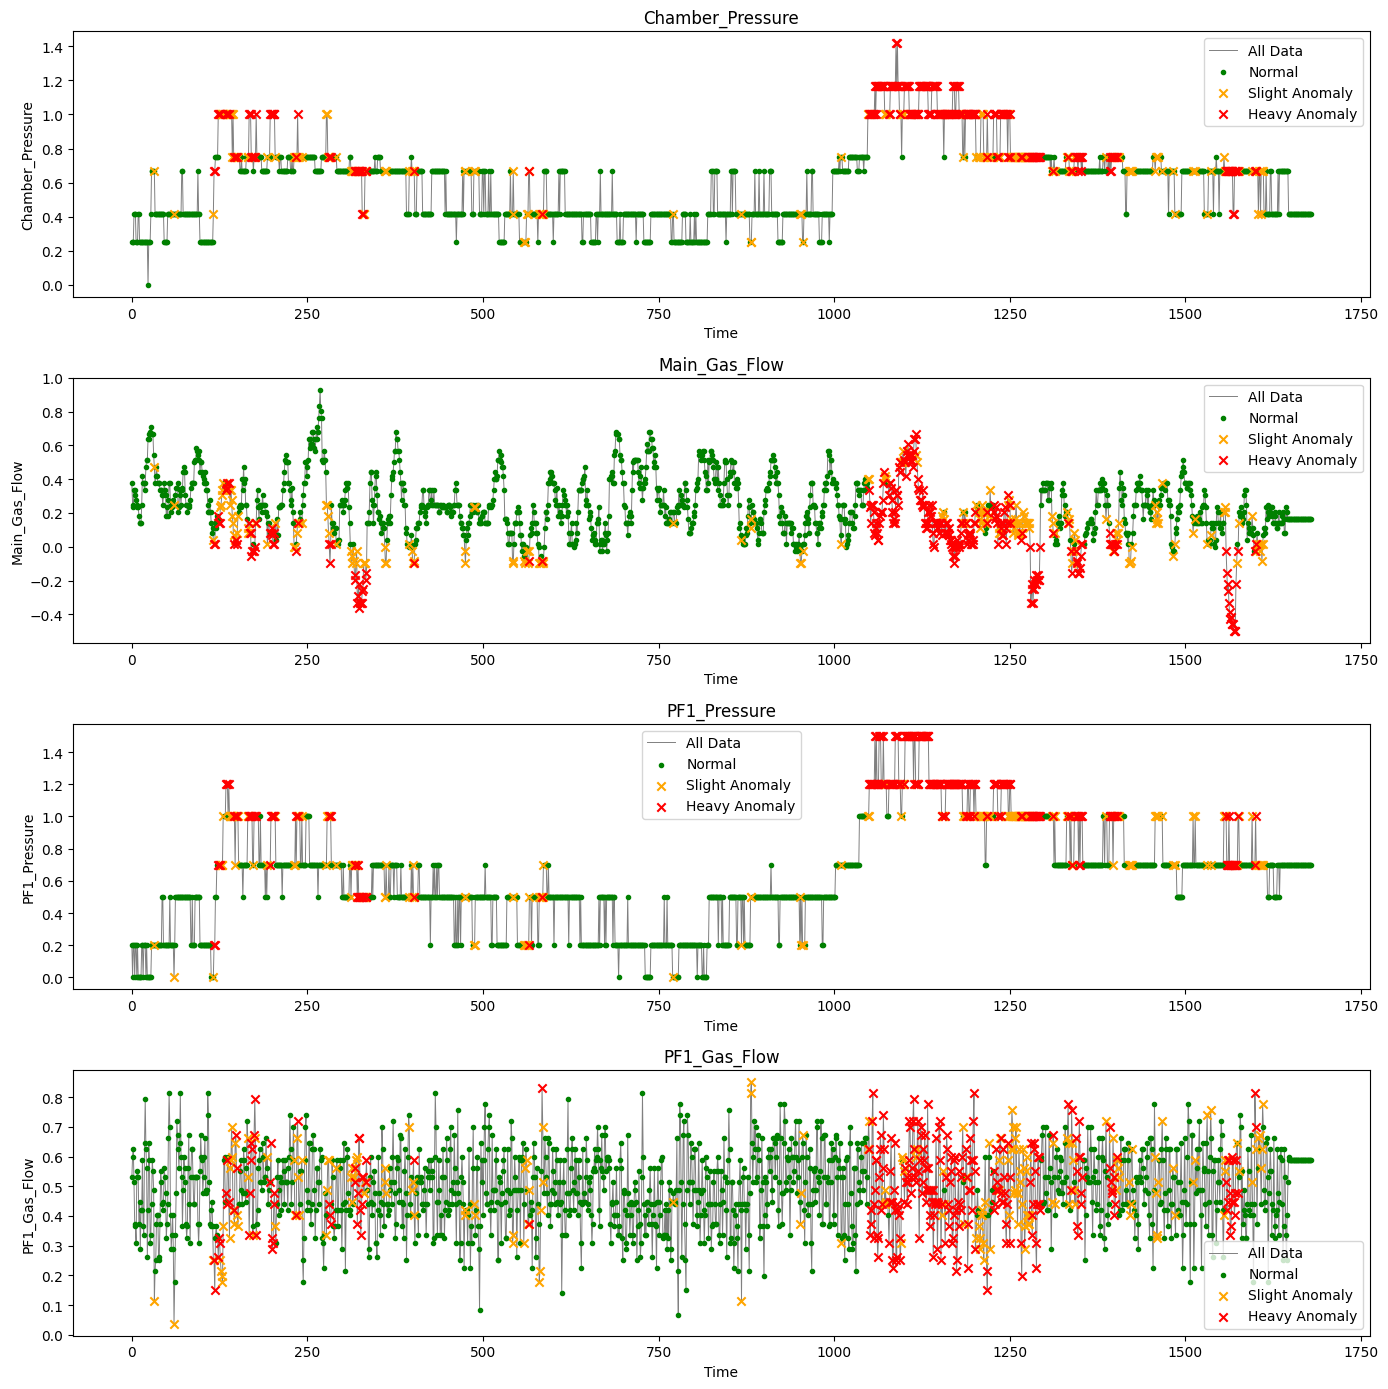

In [11]:
from sklearn.covariance import EllipticEnvelope

pros_param = ["Chamber_Pressure", "Main_Gas_Flow", "PF1_Pressure", "PF1_Gas_Flow"]

# Ensure good_data and bad_data only contain the relevant columns
good_data = g_df[pros_param]
bad_data = b_df[pros_param]

# Fit MinMaxScaler to good_data and transform both datasets
scaler = MinMaxScaler()
scaler.fit(good_data)  # Fit scaler only on good data
good_data_scaled = pd.DataFrame(scaler.transform(good_data), columns=pros_param, index=good_data.index)
bad_data_scaled = pd.DataFrame(scaler.transform(bad_data), columns=pros_param, index=bad_data.index)

# Train Elliptic Envelope on scaled good data
elliptic_env = EllipticEnvelope(contamination=0.01, random_state=0)
elliptic_env.fit(good_data_scaled)

# Get anomaly scores for scaled bad data
bad_data_scaled['anomaly_score'] = elliptic_env.decision_function(bad_data_scaled)

# Define thresholds for slight and heavy anomalies
outlier_threshold = 0  # Adjust based on your data
heavy_outlier = -5  # Adjust based on your data

# Classify anomalies
bad_data_scaled['anomaly_category'] = bad_data_scaled['anomaly_score'].apply(
    lambda x: 'Heavy Anomaly' if x <= heavy_outlier else ('Slight Anomaly' if heavy_outlier < x < outlier_threshold else 'Normal')
)

# Visualize anomalies for each parameter in a grid
def plot_anomalies_grid(df, pros_param):
    fig, axes = plt.subplots(len(pros_param), 1, figsize=(14, 14))  # Create a grid of subplots
    axes = axes.flatten()  # Flatten the axes array for easier indexing

    for i, param in enumerate(pros_param):
        ax = axes[i]
        normal_data = df[df['anomaly_category'] == 'Normal']
        slight_anomalies = df[df['anomaly_category'] == 'Slight Anomaly']
        heavy_anomalies = df[df['anomaly_category'] == 'Heavy Anomaly']

        ax.plot(df.index, df[param], linewidth=0.7, color='grey', zorder=0, label='All Data')
        ax.scatter(normal_data.index, normal_data[param], color='green', label='Normal', marker='.')
        ax.scatter(slight_anomalies.index, slight_anomalies[param], color='orange', label='Slight Anomaly', marker='x')
        ax.scatter(heavy_anomalies.index, heavy_anomalies[param], color='red', label='Heavy Anomaly', marker='x')
        ax.set_title(f'{param}')
        ax.set_xlabel('Time')
        ax.set_ylabel(param)
        ax.legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Call the function to plot the anomalies
plot_anomalies_grid(bad_data_scaled, pros_param)


In [12]:
from joblib import dump

# Save the trained model to a file
dump(elliptic_env, "../trained_model/elliptic_env_glass.joblib")
print("Model saved as elliptic_env_glass.joblib")

Model saved as elliptic_env_glass.joblib


In [13]:
# from sklearn.covariance import EllipticEnvelope

# # Ensure good_data and bad_data only contain the relevant columns
# good_data = g_df[pros_param]
# bad_data = b_df[pros_param]

# # Train Elliptic Envelope on good data
# elliptic_env = EllipticEnvelope(contamination=0.01, random_state=0)
# elliptic_env.fit(good_data)

# # Get anomaly scores for bad data
# good_data['anomaly_score'] = elliptic_env.decision_function(good_data)

# # Define thresholds for slight and heavy anomalies
# outlier_threshold = 0  # Adjust based on your data
# heavy_outlier = -5  # Adjust based on your data

# # Classify anomalies
# good_data['anomaly_category'] = good_data['anomaly_score'].apply(
#     lambda x: 'Heavy Anomaly' if x <= heavy_outlier else ('Slight Anomaly' if heavy_outlier < x < outlier_threshold else 'Normal')
# )

# # Visualize anomalies for each parameter in a 2x2 grid
# def plot_anomalies_grid(df, pros_param):
#     fig, axes = plt.subplots(4, 1, figsize=(14, 14))  # Create a grid of subplots
#     axes = axes.flatten()  # Flatten the axes array for easier indexing

#     for i, param in enumerate(pros_param):
#         ax = axes[i]
#         normal_data = df[df['anomaly_category'] == 'Normal']
#         slight_anomalies = df[df['anomaly_category'] == 'Slight Anomaly']
#         heavy_anomalies = df[df['anomaly_category'] == 'Heavy Anomaly']

#         ax.plot(df.index, df[param], linewidth=0.7, color='grey', zorder=0)
#         ax.scatter(normal_data.index, normal_data[param], color='green', label='Normal', marker='.')
#         ax.scatter(slight_anomalies.index, slight_anomalies[param], color='orange', label='Slight Anomaly', marker='x')
#         ax.scatter(heavy_anomalies.index, heavy_anomalies[param], color='red', label='Heavy Anomaly', marker='x')
#         ax.set_title(f'{param}')
#         ax.set_xlabel('Time')
#         ax.set_ylabel(param)
#         ax.legend()

#     # Adjust layout to prevent overlap
#     plt.tight_layout()
#     plt.show()

# # Call the function to plot the anomalies
# plot_anomalies_grid(good_data, pros_param)


In [14]:
# # Ensure good_data and bad_data only contain the relevant columns
# good_data = g_df[pros_param]
# bad_data = b_df[pros_param]

# # Train Elliptic Envelope on good data
# elliptic_env = EllipticEnvelope(contamination=0.01, random_state=0)
# elliptic_env.fit(bad_data)

# # Get anomaly scores for bad data
# bad_data['anomaly_score'] = elliptic_env.decision_function(bad_data)

# # Define thresholds for slight and heavy anomalies
# outlier_threshold = 0  # Adjust based on your data
# heavy_outlier = -5  # Adjust based on your data

# # Classify anomalies
# bad_data['anomaly_category'] = bad_data['anomaly_score'].apply(
#     lambda x: 'Heavy Anomaly' if x <= heavy_outlier else ('Slight Anomaly' if heavy_outlier < x < outlier_threshold else 'Normal')
# )

# # Visualize anomalies for each parameter in a 2x2 grid
# def plot_anomalies_grid(df, pros_param):
#     fig, axes = plt.subplots(4, 1, figsize=(14, 14))  # Create a grid of subplots
#     axes = axes.flatten()  # Flatten the axes array for easier indexing

#     for i, param in enumerate(pros_param):
#         ax = axes[i]
#         normal_data = df[df['anomaly_category'] == 'Normal']
#         slight_anomalies = df[df['anomaly_category'] == 'Slight Anomaly']
#         heavy_anomalies = df[df['anomaly_category'] == 'Heavy Anomaly']

#         ax.plot(df.index, df[param], label=f'{param}', linewidth=0.7, color='grey', zorder=0)
#         ax.scatter(normal_data.index, normal_data[param], color='green', label='Normal', marker='.')
#         ax.scatter(slight_anomalies.index, slight_anomalies[param], color='orange', label='Slight Anomaly', marker='x')
#         ax.scatter(heavy_anomalies.index, heavy_anomalies[param], color='red', label='Heavy Anomaly', marker='x')
#         ax.set_title(f'Anomalies Detected in {param}')
#         ax.set_xlabel('Time')
#         ax.set_ylabel(param)
#         ax.legend()

#     # Adjust layout to prevent overlap
#     plt.tight_layout()
#     plt.show()

# # Call the function to plot the anomalies
# plot_anomalies_grid(bad_data, pros_param)

Testing on other datasets

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from joblib import load
import matplotlib.dates as mdates

def elip_env_eval(
    df,
    start_time,
    end_time,
    spray_start_time,
    spray_end_time,
    pros_param,
    outlier_threshold=0,
    heavy_outlier=-5,
    model_path=""
):
    """
    Evaluate anomalies in the dataset using a pre-trained Elliptic Envelope model and visualize results.

    Parameters:
    - df (DataFrame): Input DataFrame containing the data.
    - start_time (str): Start time for filtering the dataset.
    - end_time (str): End time for filtering the dataset.
    - spray_start_time (str): Start time of the spray process.
    - spray_end_time (str): End time of the spray process.
    - pros_param (list): List of relevant feature column names.
    - outlier_threshold (float): Threshold for slight anomalies. Default is 0.
    - heavy_outlier (float): Threshold for heavy anomalies. Default is -5.
    - model_path (str): Path to the pre-trained Elliptic Envelope model.

    Returns:
    - None
    """

    # Ensure the DataFrame contains datetime and filter time ranges
    df['TimeStamp'] = pd.to_datetime(df['TimeStamp'], format="%Y%m%dT%H:%M:%S.%f")
    start_time = pd.to_datetime(start_time, format="%Y%m%dT%H:%M:%S.%f")
    end_time = pd.to_datetime(end_time, format="%Y%m%dT%H:%M:%S.%f")
    spray_start_time = pd.to_datetime(spray_start_time, format="%Y%m%dT%H:%M:%S.%f")
    spray_end_time = pd.to_datetime(spray_end_time, format="%Y%m%dT%H:%M:%S.%f")

    # Filter data for the desired range
    df = df[(df['TimeStamp'] >= start_time) & (df['TimeStamp'] <= end_time)].reset_index(drop=True)
    spray_df = df[(df['TimeStamp'] >= spray_start_time) & (df['TimeStamp'] <= spray_end_time)].reset_index(drop=True)

    # Normalize data using spray data statistics
    X_spray = spray_df[pros_param].values
    scaler = MinMaxScaler()
    scaler.fit(X_spray)  # Fit the scaler on spray period data
    X_full = scaler.transform(df[pros_param].values)
    X_spray = scaler.transform(X_spray)

    # Replace original columns with normalized values
    for i, param in enumerate(pros_param):
        df[param] = X_full[:, i]
        spray_df[param] = X_spray[:, i]

    # Load pre-trained Elliptic Envelope model
    if not model_path:
        raise ValueError("Model path must be provided.")
    elliptic_env = load(model_path)

    # Calculate anomaly scores for the entire dataset
    df['anomaly_score'] = elliptic_env.decision_function(X_full)

    # Classify anomalies
    df['anomaly_category'] = df['anomaly_score'].apply(
        lambda x: 'Heavy Anomaly' if x <= heavy_outlier else ('Slight Anomaly' if heavy_outlier < x < outlier_threshold else 'Normal')
    )

    # Plot anomalies with legend counts
    def plot_anomalies_grid(df, pros_param, spray_start_time, spray_end_time):
        fig, axes = plt.subplots(len(pros_param), 1, figsize=(14, 14))

        for i, param in enumerate(pros_param):
            ax = axes[i]
            normal_data = df[df['anomaly_category'] == 'Normal']
            slight_anomalies = df[df['anomaly_category'] == 'Slight Anomaly']
            heavy_anomalies = df[df['anomaly_category'] == 'Heavy Anomaly']

            # Plot the data
            ax.plot(df['TimeStamp'], df[param], linewidth=0.7, color='grey', label='All Data', zorder=0)
            ax.scatter(normal_data['TimeStamp'], normal_data[param], color='green', label=f'Normal ({len(normal_data)})', marker='.')
            ax.scatter(slight_anomalies['TimeStamp'], slight_anomalies[param], color='orange', label=f'Slight Anomaly ({len(slight_anomalies)})', marker='x')
            ax.scatter(heavy_anomalies['TimeStamp'], heavy_anomalies[param], color='red', label=f'Heavy Anomaly ({len(heavy_anomalies)})', marker='x')

            # Add vertical lines for spray start and end
            ax.axvline(spray_start_time, color='blue', linestyle='--', label='Spray Start')
            ax.axvline(spray_end_time, color='blue', linestyle='--', label='Spray End')

            # Configure plot formatting
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
            ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
            ax.set_title(param)
            ax.set_xlabel('Time')
            ax.set_ylabel(param)
            ax.legend()

        # Adjust layout to prevent overlap
        plt.tight_layout()
        plt.show()

    # Call the function to plot anomalies
    plot_anomalies_grid(df, pros_param, spray_start_time, spray_end_time)


c:\Users\yongz\AppData\Local\anaconda3\envs\coldspray\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(


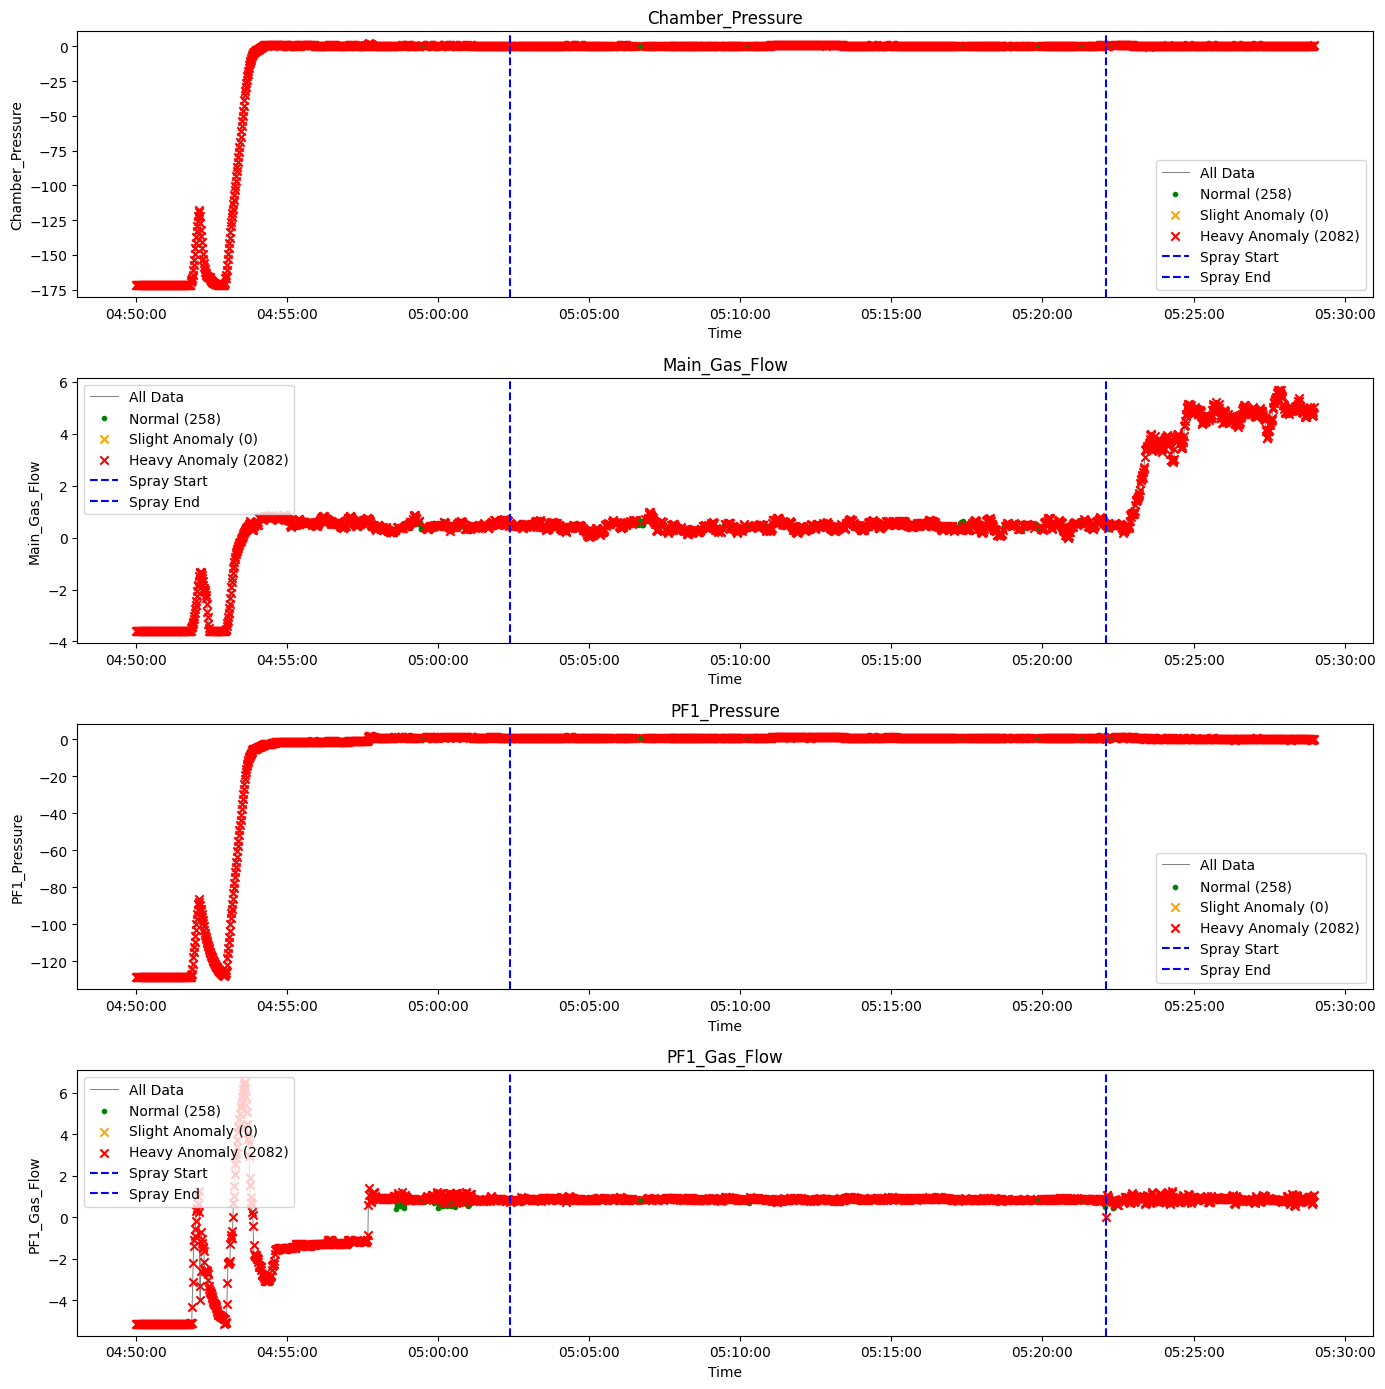

In [16]:
elip_env_eval(
    df=pd.read_csv("../data/20250115_glass.csv"),
    start_time="20250115T04:50:00.010",
    end_time="20250115T05:28:59.014",
    spray_start_time="20250115T05:02:22.022",
    spray_end_time="20250115T05:22:06.006",
    pros_param=["Chamber_Pressure", "Main_Gas_Flow", "PF1_Pressure", "PF1_Gas_Flow"],
    outlier_threshold=0,  
    heavy_outlier=5,
    model_path="../trained_model/elliptic_env_glass.joblib"
)


c:\Users\yongz\AppData\Local\anaconda3\envs\coldspray\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(


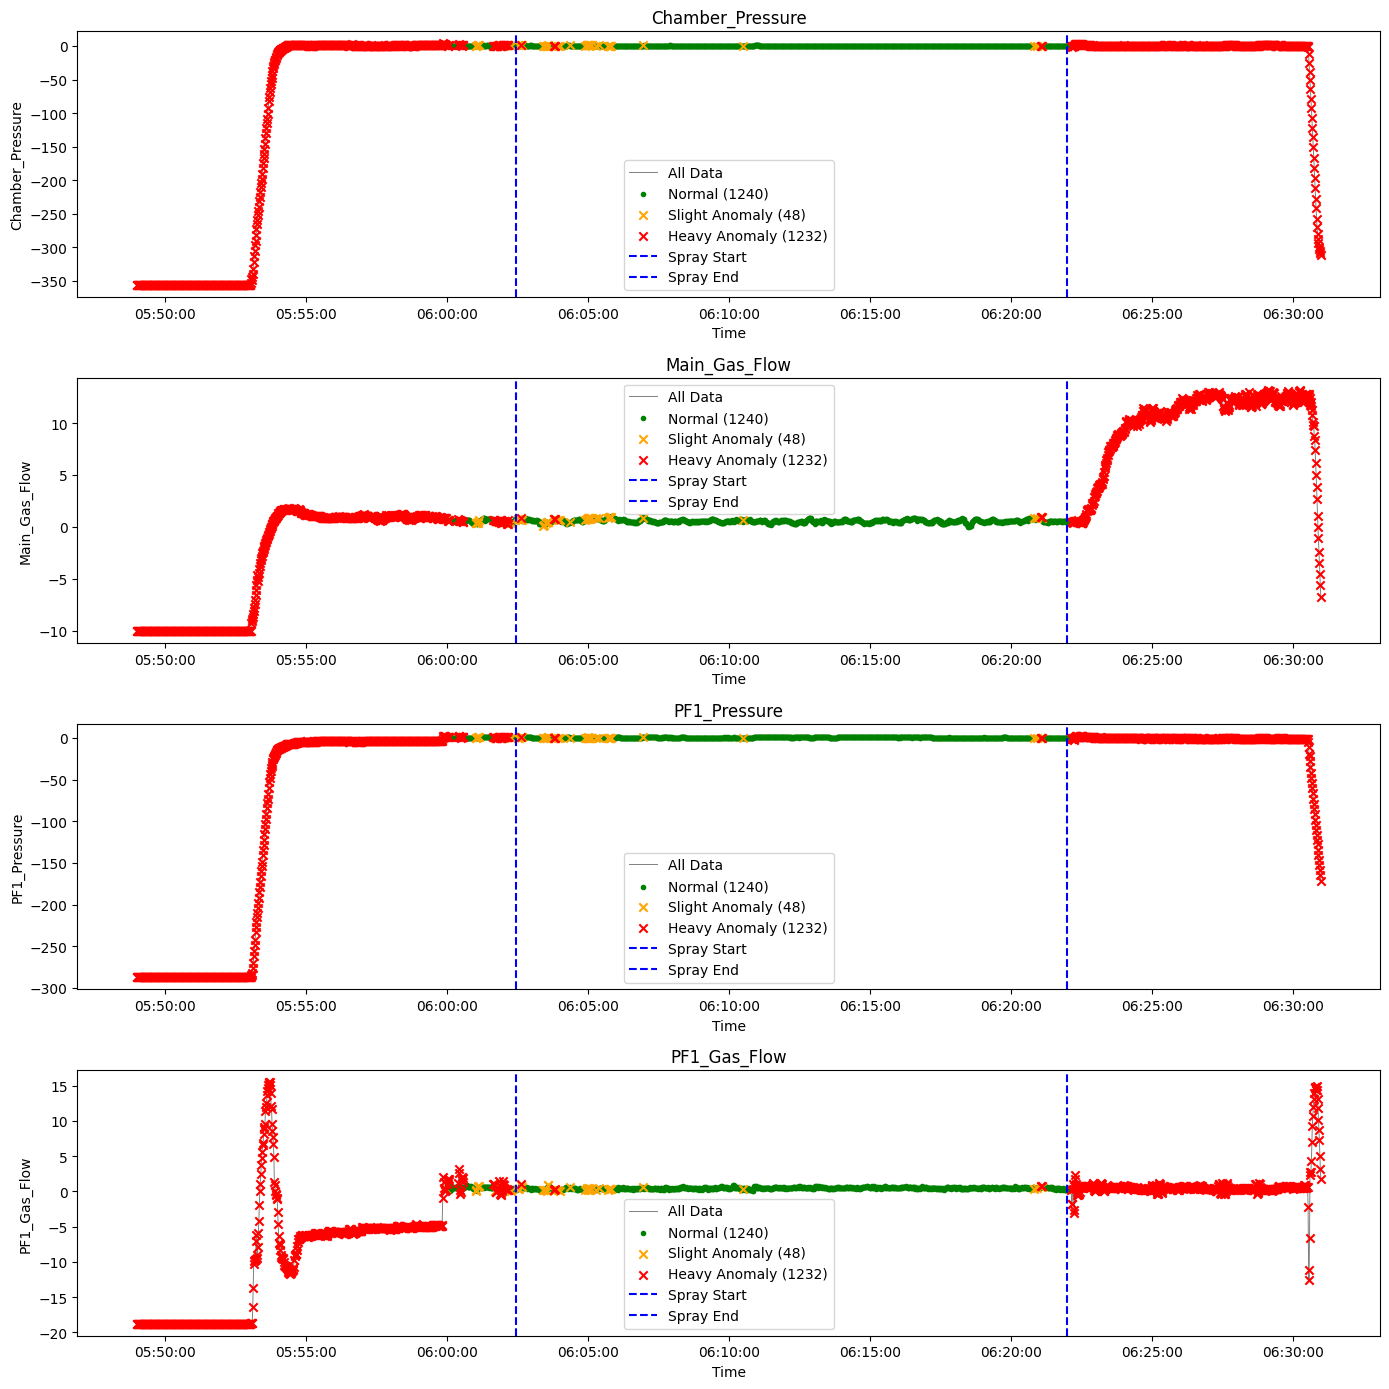

In [17]:
elip_env_eval(
    df=pd.read_csv("../data/20250115_glass.csv"),
    start_time="20250115T05:49:00.014",
    end_time="20250115T06:30:59.006",
    spray_start_time="20250115T06:02:28.010",
    spray_end_time="20250115T06:22:00.005",
    pros_param=["Chamber_Pressure", "Main_Gas_Flow", "PF1_Pressure", "PF1_Gas_Flow"],
    outlier_threshold=0,
    heavy_outlier=-5,
    model_path="../trained_model/elliptic_env_glass.joblib"
)


In [1]:
import pandas as pd

df_1 = pd.read_csv("../data/20250115_glass.csv")
df_1['TimeStamp'] = pd.to_datetime(df_1['TimeStamp'], format="%Y%m%dT%H:%M:%S.%f")

# b_spray_start_time=pd.to_datetime("20250115T05:02:22.022", format="%Y%m%dT%H:%M:%S.%f")
# b_spray_end_time=pd.to_datetime("20250115T05:22:06.006", format="%Y%m%dT%H:%M:%S.%f")
# g_spray_start_time=pd.to_datetime("20250115T06:02:28.010", format="%Y%m%dT%H:%M:%S.%f")
# g_spray_end_time=pd.to_datetime("20250115T06:22:00.005", format="%Y%m%dT%H:%M:%S.%f")

# b_spray_df = df_1[(df_1['TimeStamp'] >= b_spray_start_time) & (df_1['TimeStamp'] <= b_spray_end_time)].reset_index(drop=True)
# g_spray_df = df_1[(df_1['TimeStamp'] >= g_spray_start_time) & (df_1['TimeStamp'] <= g_spray_end_time)].reset_index(drop=True)


b_start_time=pd.to_datetime("20250115T04:50:00.010", format="%Y%m%dT%H:%M:%S.%f")
b_end_time=pd.to_datetime("20250115T05:28:59.014", format="%Y%m%dT%H:%M:%S.%f")
g_start_time=pd.to_datetime("20250115T05:49:00.014", format="%Y%m%dT%H:%M:%S.%f")
g_end_time=pd.to_datetime("20250115T06:30:59.006", format="%Y%m%dT%H:%M:%S.%f")

b_spray_df = df_1[(df_1['TimeStamp'] >= b_start_time) & (df_1['TimeStamp'] <= b_end_time)].reset_index(drop=True)
g_spray_df = df_1[(df_1['TimeStamp'] >= g_start_time) & (df_1['TimeStamp'] <= g_end_time)].reset_index(drop=True)

b_spray_df['Nozzle_Condition'] = 0
g_spray_df['Nozzle_Condition'] = 1

df_concat_1 = pd.concat([b_spray_df, g_spray_df], ignore_index=True)

print(df_concat_1.shape)
df_concat_1

(4860, 12)


,TimeStamp,ABB_X_Pos,ABB_Y_Pos,ABB_Z_Pos,Chamber_Temp,Chamber_Pressure,Main_Gas_Flow,PF2_Pressure,PF2_Gas_Flow,PF1_Pressure,PF1_Gas_Flow,Nozzle_Condition
0,2025-01-15 04:50:00.010,0,0,0,25,0.006,1,0.002,0.0,0.002,0.0,0
1,2025-01-15 04:50:01.016,0,0,0,25,0.006,1,0.002,0.0,0.002,0.0,0
2,2025-01-15 04:50:02.001,0,0,0,25,0.006,1,0.002,0.0,0.002,0.0,0
3,2025-01-15 04:50:03.021,0,0,0,25,0.006,1,0.002,0.0,0.002,0.0,0
4,2025-01-15 04:50:04.018,0,0,0,25,0.006,1,0.002,0.0,0.002,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4855,2025-01-15 06:30:55.027,0,0,0,41,0.805,1288,0.002,0.0,2.537,428.1,1
4856,2025-01-15 06:30:56.001,0,0,0,42,0.754,1115,0.002,0.0,2.425,406.1,1
4857,2025-01-15 06:30:57.004,0,0,0,43,0.707,927,0.002,0.0,2.310,372.2,1
4858,2025-01-15 06:30:58.024,0,0,0,44,0.666,752,0.002,0.0,2.207,343.0,1


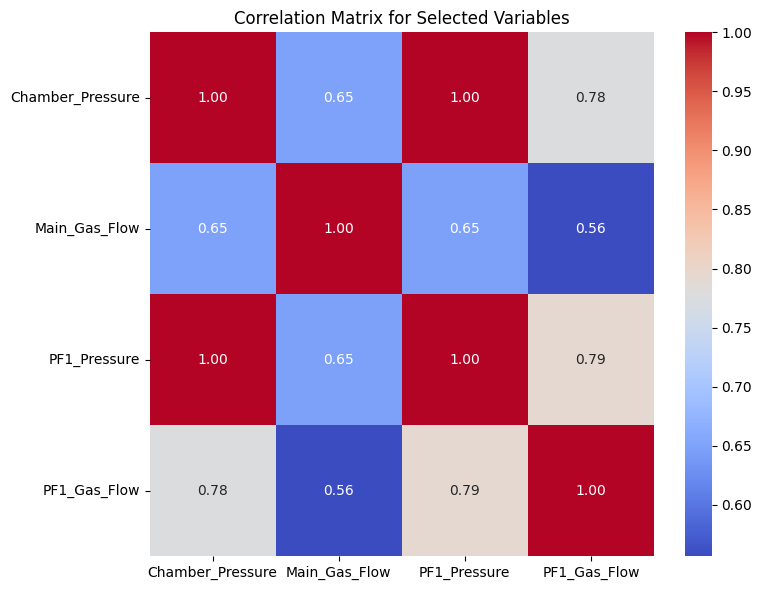

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to trim DataFrames to the shortest length
def trim_to_shortest_length(df, variables):
    # Find the minimum length among all variables
    min_length = min(len(df[var].dropna()) for var in variables)
    # Trim all variables to the shortest length
    trimmed_df = df.iloc[:min_length]
    return trimmed_df

# Function to compute correlation matrix
def compute_trimmed_correlation_matrix(trimmed_df, variables):
    n = len(variables)
    correlation_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            correlation_matrix[i, j] = trimmed_df[variables[i]].corr(trimmed_df[variables[j]])
    
    return correlation_matrix

# Plot the correlation matrix
def plot_correlation_matrix(correlation_matrix, variables):
    plt.figure(figsize=(8,6))
    sns.heatmap(
        correlation_matrix, 
        annot=True, 
        fmt=".2f", 
        cmap="coolwarm", 
        xticklabels=variables, 
        yticklabels=variables
    )
    plt.title("Correlation Matrix for Selected Variables")
    plt.tight_layout()
    plt.show()


# Variables of interest
variables = ["Chamber_Pressure", "Main_Gas_Flow", "PF1_Pressure", "PF1_Gas_Flow"]

trimmed_df = trim_to_shortest_length(b_spray_df, variables)
correlation_matrix = compute_trimmed_correlation_matrix(trimmed_df, variables)
plot_correlation_matrix(correlation_matrix, variables)


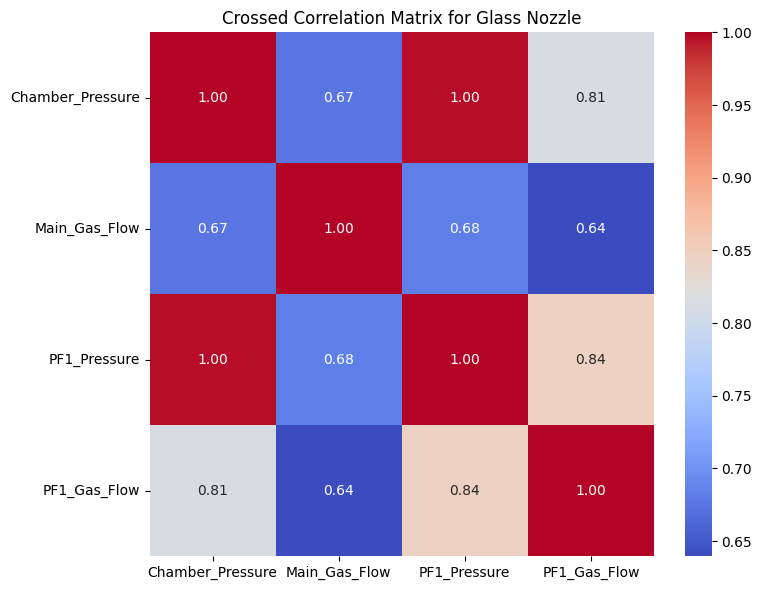

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Define the mean function
def mean(arr):
    return sum(arr) / len(arr)

# Define the cross-correlation function
def cross_correlation(x, y):
    # Calculate means
    x_mean = mean(x)
    y_mean = mean(y)
    
    # Calculate numerator
    numerator = sum((a - x_mean) * (b - y_mean) for a, b in zip(x, y))
    
    # Calculate denominators
    x_sq_diff = sum((a - x_mean) ** 2 for a in x)
    y_sq_diff = sum((b - y_mean) ** 2 for b in y)
    denominator = math.sqrt(x_sq_diff * y_sq_diff)
    
    # Return the correlation value
    return numerator / denominator

# Function to calculate the correlation matrix with normalization
def compute_correlation_matrix(df, variables):
    n = len(variables)
    correlation_matrix = np.zeros((n, n))
    
    # Normalize the data using MinMaxScaler
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(df[variables].values)
    
    # Compute correlations for each pair of variables
    for i in range(n):
        for j in range(n):
            correlation_matrix[i, j] = cross_correlation(normalized_data[:, i], normalized_data[:, j])
    
    return correlation_matrix

# Function to plot the correlation matrix
def plot_correlation_matrix(correlation_matrix, variables):
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        xticklabels=variables,
        yticklabels=variables
    )
   
    plt.title('Crossed Correlation Matrix for Glass Nozzle')
    plt.tight_layout()
    plt.show()

# Example usage
variables = ["Chamber_Pressure", "Main_Gas_Flow", "PF1_Pressure", "PF1_Gas_Flow"]
correlation_matrix = compute_correlation_matrix(g_spray_df, variables)
plot_correlation_matrix(correlation_matrix, variables)


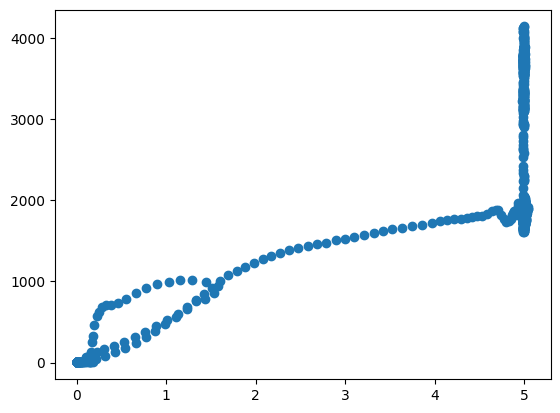

In [9]:
plt.figure()
plt.scatter(b_spray_df["Chamber_Pressure"], b_spray_df["Main_Gas_Flow"])
plt.show()